# Scrap appearance words

In [1]:
from urllib.request import Request, urlopen
import ssl
from bs4 import BeautifulSoup

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

target_words = {}

# Scrap the appearance topic
url = "https://www.oxfordlearnersdictionaries.com/topic/appearance"
req = Request(url, headers=headers)
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE
response = urlopen(req, context=context)
soup_apperance = BeautifulSoup(response, "html.parser")

subtopics = ["attractiveness_t","body_shape_t","describing_hair_t","skin_t","styling_hair_t"]
for subtopic in subtopics:
    li_tags = soup_apperance.findAll("li", attrs={"data-"+subtopic: ["a1","a2","b1","b2","c1","c2"]})
    target_words[subtopic] = [li.get("data-hw") for li in li_tags]


# Scrap the body topic
url = "https://www.oxfordlearnersdictionaries.com/topic/body"
req = Request(url, headers=headers)
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE
response = urlopen(req, context=context)
soup_body = BeautifulSoup(response, "html.parser")

subtopics = ["face_t","hands_and_feet_t","mouth_and_teeth_t","parts_of_the_body_t"]
for subtopic in subtopics:
    li_tags = soup_body.findAll("li", attrs={"data-"+subtopic: ["a1","a2","b1","b2","c1","c2"]})
    target_words[subtopic] = [li.get("data-hw") for li in li_tags]


# Scrap the clothes topic
url = "https://www.oxfordlearnersdictionaries.com/topic/clothes-and-fashion"
req = Request(url, headers=headers)
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE
response = urlopen(req, context=context)
soup_clothes = BeautifulSoup(response, "html.parser")

subtopics = ["accessories_t","describing_clothes_t","footwear_t","hats_t","items_of_clothing_t","jewellery_t","parts_of_clothing_t"]
for subtopic in subtopics:
    li_tags = soup_clothes.findAll("li", attrs={"data-"+subtopic: ["a1","a2","b1","b2","c1","c2"]})
    target_words[subtopic] = [li.get("data-hw") for li in li_tags]



# Count the scraped word in each sub-topic
print("Scrapping results:")
for k,v in target_words.items():
    print(k, len(v))

# Put together all target words
words = []
for i in target_words.values():
    words.extend(i)

target_word_complete = list(set(words))

# file = open("target_word_complete.txt","w")

# for item in target_word_complete:
#     file.write(item+"\n")

# file.close()

/tmp/ipython-input-2644150730.py:20: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  li_tags = soup_apperance.findAll("li", attrs={"data-"+subtopic: ["a1","a2","b1","b2","c1","c2"]})
/tmp/ipython-input-2644150730.py:35: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  li_tags = soup_body.findAll("li", attrs={"data-"+subtopic: ["a1","a2","b1","b2","c1","c2"]})


Scrapping results:
attractiveness_t 67
body_shape_t 53
describing_hair_t 135
skin_t 42
styling_hair_t 77
face_t 43
hands_and_feet_t 29
mouth_and_teeth_t 30
parts_of_the_body_t 63
accessories_t 32
describing_clothes_t 134
footwear_t 65
hats_t 56
items_of_clothing_t 150
jewellery_t 54
parts_of_clothing_t 30


/tmp/ipython-input-2644150730.py:50: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  li_tags = soup_clothes.findAll("li", attrs={"data-"+subtopic: ["a1","a2","b1","b2","c1","c2"]})


In [2]:
target_words.keys()

dict_keys(['attractiveness_t', 'body_shape_t', 'describing_hair_t', 'skin_t', 'styling_hair_t', 'face_t', 'hands_and_feet_t', 'mouth_and_teeth_t', 'parts_of_the_body_t', 'accessories_t', 'describing_clothes_t', 'footwear_t', 'hats_t', 'items_of_clothing_t', 'jewellery_t', 'parts_of_clothing_t'])

In [4]:
word_count = 0
for cate in target_words:
    word_count += len(target_words[cate])
print(word_count)

1060


# Gendered Name

In [ ]:
names_result = {'Emma': {'Female': ['Patty',
   'Fairfax',
   'Harriet',
   'Bates',
   'Emma',
   'Miss',
   'Isabella',
   'Jane'],
  'Male': ['Henry', 'William', 'Donwell', 'Frank', 'James', 'George']},
 'Great_Expectations': {'Female': ['Clara',
   'Biddy',
   'Estella',
   'Flopson',
   'Mum',
   'Sarah',
   'Jane'],
  'Male': ['Herbert',
   'Pumblechook',
   'Joe',
   'Wopsle',
   'Drummle',
   'Orlick',
   'Jaggers',
   'Handel',
   'Pip',
   'Provis']},
 'Jane_Eyre': {'Female': ['Janet',
   'Diana',
   'Helen',
   'Mary',
   'Bessie',
   'Hannah',
   'Miss',
   'Jane'],
  'Male': ['John',
   'Edward',
   'St.',
   'Briggs',
   'Dent',
   'Sam',
   'Richard',
   'Carter',
   'Rivers']},
 'Little_Women': {'Female': ['Amy',
   'Sallie',
   'Meg',
   'Daisy',
   'Jo',
   'Hannah',
   'Marmee',
   'Beth',
   'Margaret',
   'Kate'],
  'Male': ['John',
   'Fred',
   'Roderigo',
   'Teddy',
   'Laurie',
   'Demi',
   'Ned',
   'Frank',
   'Fritz']},
 'Lolita': {'Female': ['Jean',
   'Louise',
   'Annabel',
   'Dolores',
   'Rita',
   'Mary',
   'Monique',
   'Lolita',
   'Lo',
   'Mona'],
  'Male': ['Tony',
   'John',
   'McCoo',
   'Humbert',
   'Dick',
   'Leslie',
   'Bill',
   'Gaston',
   'Roy',
   'Quilty']},
 'Mrs_Dalloway_in_Bond_Street': {'Female': ['Clarissa', 'Mrs'],
  'Male': ['Dick', 'Hugh']},
 'Pride_and_Prejudice': {'Female': ['Kitty',
   'Lizzy',
   'Lady',
   'Lydia',
   'Mary',
   'Maria',
   'Elizabeth',
   'Jane'],
  'Male': ['Longbourn',
   'Charles',
   'Denny',
   'Meryton',
   'Fitzwilliam',
   'George']},
 'The_Great_Gatsby': {'Female': ['Daisy',
   'Jordan',
   'Catherine',
   'Sloane',
   'Myrtle'],
  'Male': ['Jay',
   'Tom',
   'Nick',
   'Dan',
   'Wilson',
   'Gatsby',
   'Wolfshiem',
   'Klipspringer',
   'George']},
 'The_Three_Musketeers': {'Female': ['Milady', 'Kitty', 'Anne', 'La', 'Mme'],
  'Male': ['Grimaud',
   'Artagnan',
   'Aramis',
   'Mousqueton',
   'Richelieu',
   'Felton',
   'Lord',
   'Tréville',
   'Bazin',
   'Planchet']},
 'Villette': {'Female': ['Justine',
   'Cleopatra',
   'Harriet',
   'Paulina',
   'Georgette',
   'Goton',
   'Madame',
   'Ginevra',
   'Lucy'],
  'Male': ['Monsieur', 'John', 'Hamal', 'Graham', 'Paul', 'Warren', 'de']}}

# WEAT Test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Github/Male_Gaze_NLP/src'

from WEAT import Embeddings, weat_test

from tqdm.notebook import tqdm
import os
import re
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load glove embeddings
glove = Embeddings.from_file("/content/drive/MyDrive/NLU1012_Project/OLD/Code/WEAT Test/glove.6B.50d.txt")

Mounted at /content/drive
/content/drive/MyDrive/Github/Male_Gaze_NLP/src


In [ ]:
model_dir = '/content/drive/MyDrive/NLU1012_Project/word_embeddings/'

res = {}
data = defaultdict(list)

for filename in tqdm(os.listdir(model_dir)):
    doc_name = re.match("^[^.]+", filename).group()
    res[doc_name] = {}
    effect_size, p_value, effect_size_base, p_value_base = weat_test(model_dir, doc_name, names_result, target_word_complete, glove, 1000)
    data['all_words'].append(effect_size - effect_size_base)
    for subtopic, words in target_words.items():
        effect_size, p_value, effect_size_base, p_value_base = weat_test(model_dir, doc_name, names_result, words, glove, 1000)
        res[doc_name][subtopic] = {'effect_size': effect_size, 'p_value': p_value, 'effect_size_base': effect_size_base, 'p_value_base': p_value_base}
        data[subtopic].append(effect_size - effect_size_base)


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(data)
df = df.set_axis([re.match("^[^.]+", filename).group() for filename in os.listdir(model_dir)], axis='index')

In [ ]:
df

,all_words,attractiveness_t,body_shape_t,describing_hair_t,skin_t,styling_hair_t,face_t,hands_and_feet_t,mouth_and_teeth_t,parts_of_the_body_t,accessories_t,describing_clothes_t,footwear_t,hats_t,items_of_clothing_t,jewellery_t,parts_of_clothing_t
Jane_Eyre,0.101157,0.023752,0.095676,0.093208,0.053631,0.110762,-0.193770,-0.023771,0.040555,0.068937,0.228250,0.158607,0.253220,0.164756,0.091550,-0.125489,0.154269
Lolita,-0.223967,-0.385088,-0.219147,-0.164991,-0.225121,-0.064935,-0.184011,0.093155,-0.171903,-0.104537,-0.048654,-0.263323,0.022386,0.000342,-0.265937,-0.495753,-0.105654
Pride_and_Prejudice,-0.100256,-0.031675,-0.134428,-0.151301,0.173475,-0.219661,0.127274,-0.546029,-0.182448,-0.010556,-0.410526,-0.119844,-0.555295,-0.262854,-0.258595,-0.383581,-0.215446
Emma,-0.129933,-0.042839,0.110447,-0.115802,-0.365388,-0.008491,-0.187328,-0.136353,-0.170962,0.214098,-0.468790,-0.209051,-0.227802,-0.122224,-0.442424,-0.175035,-0.062083
Little_Women,-0.008165,-0.193338,0.199304,-0.093981,0.136590,-0.128628,-0.297557,-0.060149,-0.067296,0.224756,-0.005033,0.139416,-0.024033,0.022667,-0.039671,-0.238270,-0.080284
Mrs_Dalloway_in_Bond_Street,0.107622,0.064666,0.052325,0.151019,NaN,0.235645,NaN,0.215273,NaN,0.162154,0.076634,0.155729,0.089197,NaN,0.092834,0.024090,0.076451
The_Great_Gatsby,0.149954,0.075571,0.135800,0.162926,0.211905,0.258625,0.227374,0.152446,0.179818,0.123688,0.106872,0.151756,0.163110,0.281048,0.124716,0.122787,0.096383
The_Three_Musketeers,0.416923,0.613717,0.368741,0.509542,0.503974,0.151774,0.197037,0.064814,0.300753,0.362142,0.259470,0.546353,0.083689,0.113992,0.144406,0.441334,0.092247
Villette,0.083745,-0.113276,0.041515,0.094299,-0.137607,0.172688,-0.128531,0.061659,0.106278,0.207730,0.125145,0.043291,0.147168,0.147829,0.102400,-0.011805,0.140765
Great_Expectations,-0.127423,0.241575,-0.164686,-0.239885,-0.089191,-0.387942,-0.187264,-0.226201,-0.432461,0.173844,-0.195771,-0.188589,-0.371037,-0.228897,-0.282992,0.002284,0.045605


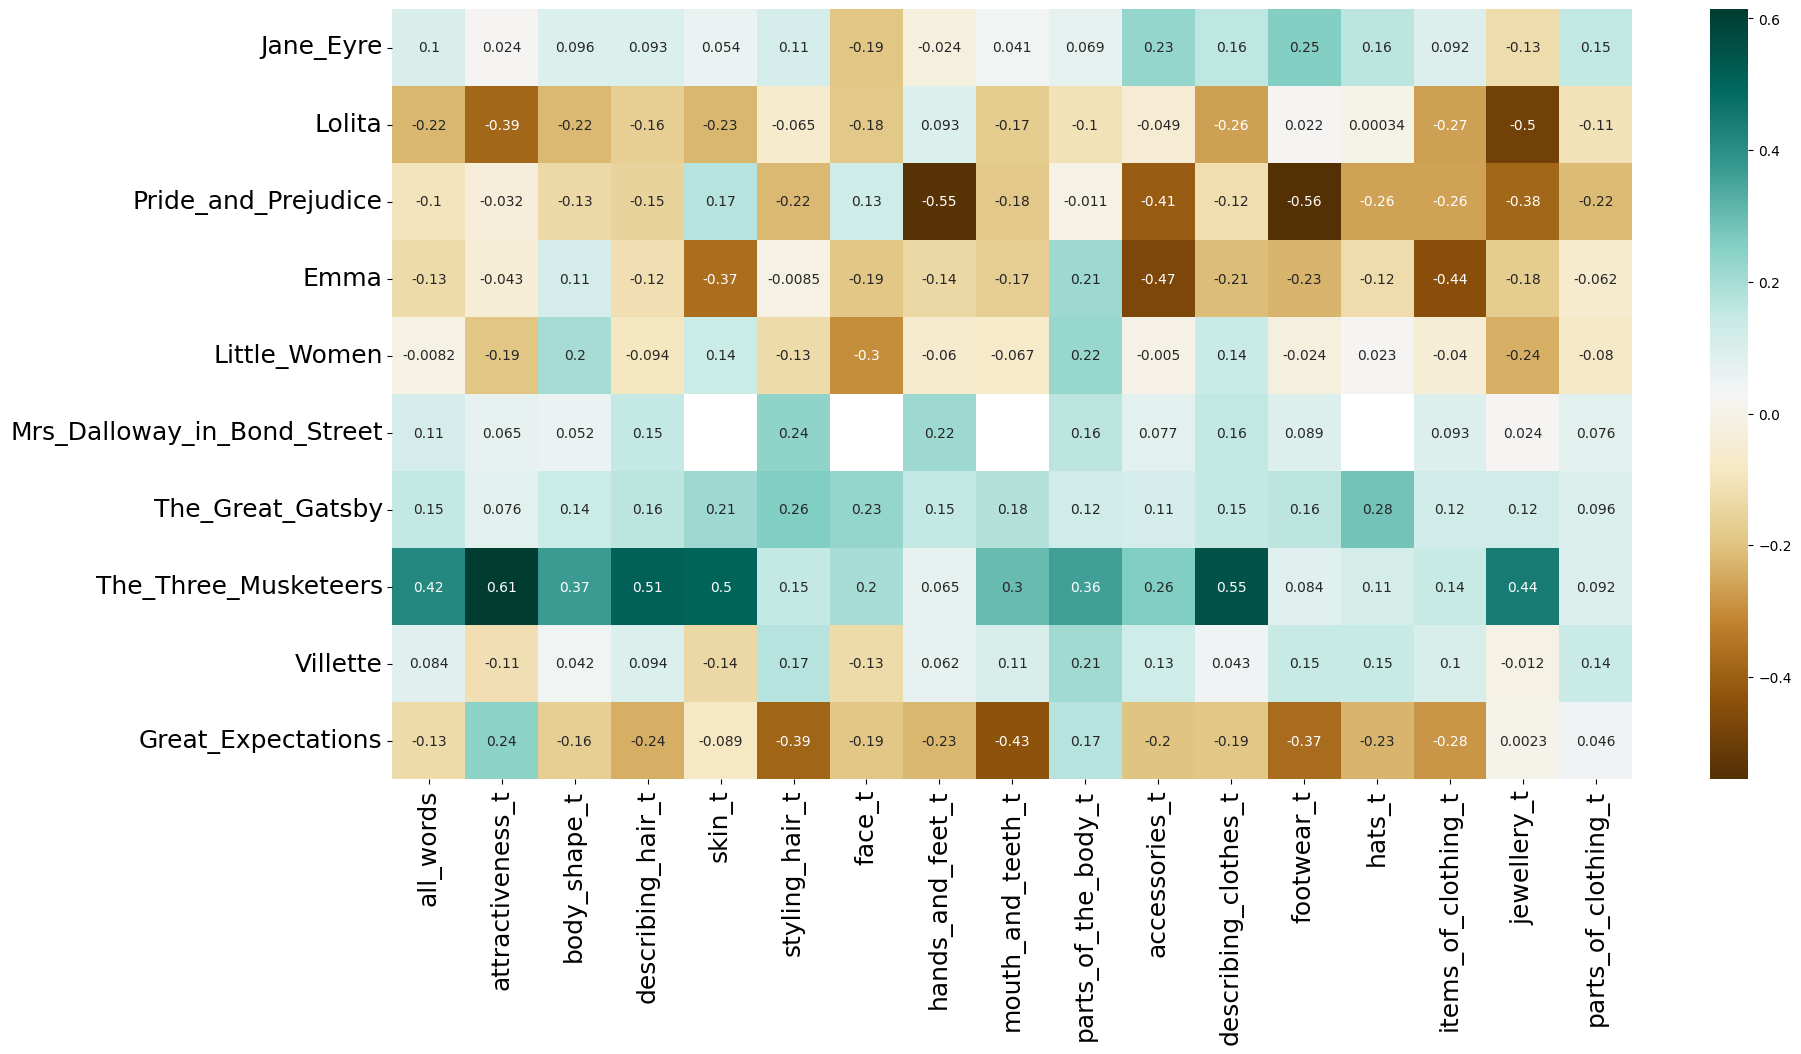

In [ ]:
fig, axs = plt.subplots(figsize=(20,10), dpi=100)
sns.heatmap(df, annot=True, cmap='BrBG', ax=axs)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()